In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
WMT = pd.read_csv('WMT.csv',index_col=0)
WMT.index = pd.to_datetime(WMT.index,format = "%Y%m%d")
WMT.index.freq = "Q"

In [2]:
WMT['WMT_1'] = WMT['WMT'].shift(1)
WMT['WMT_4'] = WMT['WMT'].shift(4)

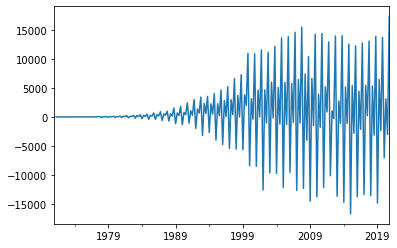

In [3]:
delta_1 = WMT['WMT'] - WMT['WMT_1']
delta_1.plot()

The first difference represents significant seasonal effect

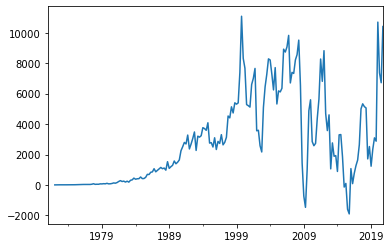

In [38]:
delta_4 = WMT['WMT'] - WMT['WMT_4']
delta_4.plot()

The seasonal differences basically is the difference of current season earnings compared with the same season last year. Differences are positive for most seasons which means Walmart is growing well.

In [8]:
WMT['WMT'][:-20]

1971-03-31        12.758
1971-06-30        18.207
1971-09-30        19.205
1971-12-31        27.844
1972-03-31        21.011
                 ...    
2014-12-31    131565.000
2015-03-31    114826.000
2015-06-30    120229.000
2015-09-30    117408.000
2015-12-31    129667.000
Freq: Q-DEC, Name: WMT, Length: 180, dtype: float64

In [9]:
ARIMA = sm.tsa.statespace.SARIMAX(WMT['WMT'][:-20], trend = 'c',order = (0,1,1)).fit()
ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    WMT   No. Observations:                  180
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -1757.102
Date:                Mon, 26 Apr 2021   AIC                           3520.204
Time:                        22:01:46   BIC                           3529.766
Sample:                    03-31-1971   HQIC                          3524.081
                         - 12-31-2015                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    687.1507    163.846      4.194      0.000     366.018    1008.283
ma.L1         -0.6415      0.077     -8.330      0.000      -0.792      -0.491
sigma2      2.401e+07      0.010   2.35e+09      0.000     2.4e+07     2.4e+07
===================================================================================
Ljung-Box (Q):                     1417.38   Jarque-Bera (JB):               139.21
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              14.65   Skew:                             1.61
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.26e+25. Standard errors may be unstable.
"""

In [10]:
SARIMA = sm.tsa.statespace.SARIMAX(WMT['WMT'][:-20],order = (0,1,1),seasonal_order = (0,1,1,4)).fit()
SARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                               WMT   No. Observations:                  180
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 4)   Log Likelihood               -1480.149
Date:                           Mon, 26 Apr 2021   AIC                           2966.298
Time:                                   22:02:08   BIC                           2975.792
Sample:                               03-31-1971   HQIC                          2970.149
                                    - 12-31-2015                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0784      0.052     -1.520      0.129      -0.180       0.023
ma.S.L4       -0.2750      0.057     -4.790      0.000      -0.388      -0.162
sigma2      1.434e+06   9.73e+04     14.737      0.000    1.24e+06    1.63e+06
===================================================================================
Ljung-Box (Q):                      119.79   Jarque-Bera (JB):               166.36
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):             799.14   Skew:                            -0.92
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
out_sample_data = WMT[-20:]
out_sample_

,Year,Quarter,WMT,WMT_1,WMT_4
2016-03-31,2016,1,115904.0,129667.0,114826.0
2016-06-30,2016,2,120319.0,115904.0,120229.0
2016-09-30,2016,3,118179.0,120319.0,117408.0
2016-12-31,2016,4,130936.0,118179.0,129667.0
2017-03-31,2017,1,117542.0,130936.0,115904.0
2017-06-30,2017,2,122968.0,117542.0,120319.0
2017-09-30,2017,3,123179.0,122968.0,118179.0
2017-12-31,2017,4,136267.0,123179.0,130936.0
2018-03-31,2018,1,122690.0,136267.0,117542.0
2018-06-30,2018,2,128028.0,122690.0,122968.0


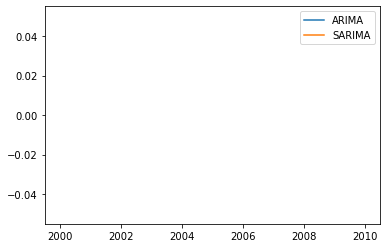

In [11]:
ARIMA_predictd = ARIMA.get_prediction().predicted_mean[-20:-4]
SARIMA_predicted = SARIMA.get_prediction().predicted_mean[-20:-4]
original_earnings = WMT['WMT'][-20:-4]

ARIMA_error = original_earnings - ARIMA_predictd
SARIMA_error = original_earnings - SARIMA_predicted

plt.plot(ARIMA_error,label = "ARIMA")
plt.plot(SARIMA_error,label = "SARIMA")
plt.legend()
plt.show()

In [60]:
print("ARIMA MSE: " + str((ARIMA_error**2).mean()))
print("SARIMA MSE: " + str((SARIMA_error**2).mean()))

ARIMA MSE: 47958316.44740263
SARIMA MSE: 1340969.2843010935


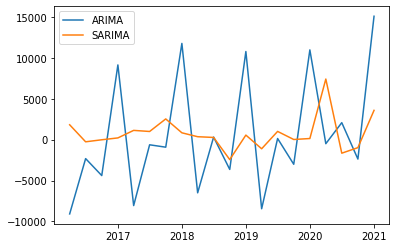

In [63]:
ARIMA_predictd = ARIMA.get_prediction().predicted_mean[-20:]
SARIMA_predicted = SARIMA.get_prediction().predicted_mean[-20:]
original_earnings = WMT['WMT'][-20:]

ARIMA_error = original_earnings - ARIMA_predictd
SARIMA_error = original_earnings - SARIMA_predicted

plt.plot(ARIMA_error,label = "ARIMA")
plt.plot(SARIMA_error,label = "SARIMA")
plt.legend()
plt.show()

In [14]:
import requests
from io import BytesIO
from datetime import datetime
import numpy as np
air2 = requests.get('https://www.stata-press.com/data/r12/air2.dta').content
data = pd.read_stata(BytesIO(air2))
data.index = pd.date_range(start=datetime(data.time[0], 1, 1), periods=len(data), freq='MS')
data['lnair'] = np.log(data['air'])


<ipython-input-14-4044f813df04>:7: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  data.index = pd.date_range(start=datetime(data.time[0], 1, 1), periods=len(data), freq='MS')
